In [1]:
import sys
from __future__ import division

In [12]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)
asavefig.formats.jpg.use = True

from phasor.signals import power_loops
from phasor.utilities.plots.loop_plot import plot_loop
from phasor.signals.filters.legendre_filters import legendreap

import scipy

from mpmath import mp

In [75]:
def legendre_controller(N = 10., UGF = 100., shift = 5.):
    z1,p1,k1 = legendreap(N)
    z1 = z1 / shift
    p1 = p1 / shift
    k1 = k1 / shift
    z1,p1,k1 = (np.array([-UGF/4,]), np.asarray([-.001] * N), 1)
    z2,p2,k2 = legendreap(N-2)
    z,p,k = power_loops.zpk_div((z1, p1, k1), (z2, p2, k2))
    Fx, hd = scipy.signal.freqresp((z,p,k), UGF)
    print(hd)
    k = k / abs(hd)
    return z, p, k
legendre_controller(10)

[-0.05941823-0.22025923j]


(array([-25.00000000+0.j        ,  -0.36717631-0.1808792j ,
         -0.36717631+0.1808792j ,  -0.30028400-0.54104225j,
         -0.30028400+0.54104225j,  -0.19427588+0.82476672j,
         -0.19427588-0.82476672j,  -0.06894216+0.98797097j,
         -0.06894216-0.98797097j]),
 array([-0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
        -0.001, -0.001]),
 array([ 97.03088307]))

[-0.93630636-2.03801793j]


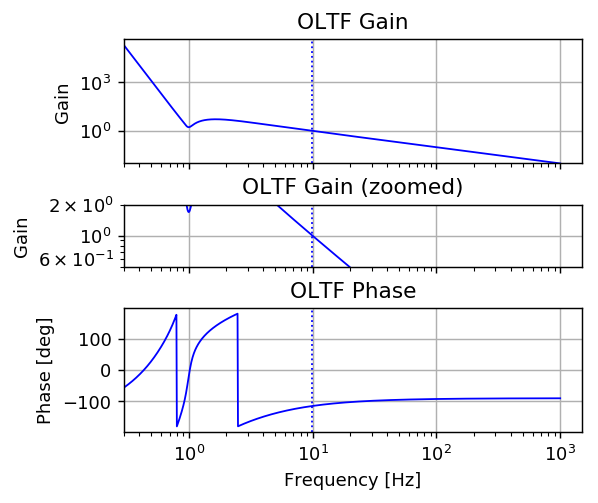

In [78]:
F = logspaced(.3, 1000, 1000)

Fx, hd = scipy.signal.freqresp(
    legendre_controller(10, shift = 2, UGF = 10.),
    F)

axF = plot_loop(F, hd, full = False)
